In [3]:
import seaborn as sns
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

# Oversampling 

In this notebook we will be looking at how oversampling can be used to improve predictions on a class of interest that has a lot fewer samples than the other classes. There are many cases where we might have data like this, for example in detection of fraud or rare diseases. 


This notebook is split into three parts: 
- part 1: use random sampling to create the training and validation sets (so no oversampling)
- part 2: use stratified sampling to create the training and validation sets (oversampling)
- part 3: answer questions comparing the solutions in parts 1 & 2 in a markdown cell below 

This notebook will be assessed directly. To submit your answers you will need to follow the instructions in insendi to upload your notebook. 

**NOTE: All the packages you will need are already imported into this notebook**

## Data Creation
We will use a handy function provided by sklearn called make_classification to create a synthetic classification dataset. This is really useful if you need a quick dataset to test a classification model on, or to use to compare classfication models. 

**The class of interest is class 0 i.e. all the points with y = 0**

no. data points in first class 53
no. data points in second class 452
no. data points in third class 452


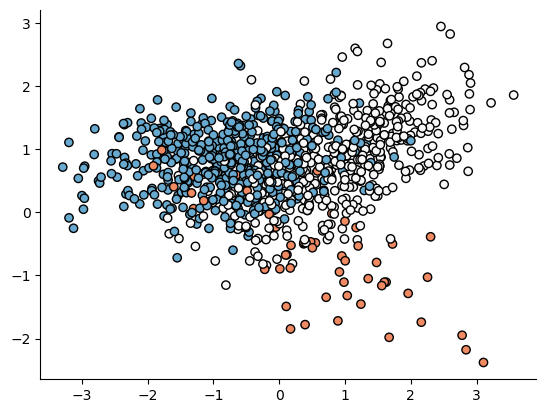

In [7]:
# Do not edit this cell 

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.45, 0.5],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

print(f'no. data points in first class {len(X[np.where(y==0)])}')
print(f'no. data points in second class {len(X[np.where(y==1)])}')
print(f'no. data points in third class {len(X[np.where(y==1)])}')

## Machine Learning Model
We will be using a Support Vector Machine (SVM) classifier for this exercise. You will learn the details of how this model works later in the course, but for now, we will simply use the implementation provided by the sklearn library. You can use the train_and_predict function to both train the model and generate predictions.

In [10]:
# Do not edit this cell

def train_and_predict(train, validation):
    """Function to fit sklearn support vector classification model and make predictions on the validation set
    :param train: the training set as a numpy array of length N_trainx(D+1) where N_train is the number of 
    training points and D is the dimensions of X (in this case 2). The extra column is the y values. 
    param validation: the validation set as a numpy array similar to train but for the validation set"""

    clf = svm.SVC()
    clf.fit(train[:, :2], train[:, 2])
    predictions = clf.predict(validation[:, :2])
    return predictions

## Part 1
First lets see how the model performs without oversampling. 

### TASK: 
1. Split the training data into 50% training and 50% validation with no oversampling (i.e. ignoring the classes the data come from). For both the training and validation sets the first two columns should be the X inputs and the final one should be the y data so you have a numpy array [X1, X2, y] 
2. Use the train_and_predict function to train the model and make predictions on the validation set 
3. Calculate the % of correct predictions and incorrect predictions and print them
4. Calculate the % of predictions on the class of interest that are correct and print it


**HINT Use the sklearn function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to divide the data. For consistancy please feed the input "random_state=1" into the train_test_split function**

In [13]:
### ANSWER ###

data = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)
train, validation = sklearn.model_selection.train_test_split(data, test_size= 0.5, shuffle=True, random_state=1)
predictions = train_and_predict(train, validation)
validation_ys = validation[:, 2]
print('% correct predictions:', (validation_ys == predictions).sum()/len(validation_ys))
print('% incorrect predictions:', (validation_ys != predictions).sum()/len(validation_ys))

indices = np.where(validation_ys == 0)
print('% correct predictions on class of interest:', (validation_ys[np.where(validation_ys == 0)] == 
                                                      predictions[np.where(validation_ys == 0)]).sum()
      /len(validation_ys[np.where(validation_ys == 0)]))

% correct predictions: 0.82
% incorrect predictions: 0.18
% correct predictions on class of interest: 0.4838709677419355


## Part 2

In this part, we will perform oversampling to balance the data.

## TASK:
1. Split the data into two groups (strata):
	• Set A → all samples from the class of interest.
	• Set B → all other samples.
2. Build the training set:
	• Randomly select 50% of the samples from Set A.
	• Add an equal number of samples from Set B.
3. Build the validation set:
	• Use the remaining 50% of Set A.
	• Add enough samples from Set B to match the original class ratio in the full dataset.

HINT:
Use the train_test_split function from sklearn:
train_test_split documentation
For consistent results, make sure to include the argument: *random_state=1*

In [17]:
### ANSWER ###

setA = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)[np.where(y==0)]
setB = np.concatenate([X, np.expand_dims(y, axis=1)], axis=1)[np.where(y!=0)]

# randomly select 50% of training samples in set A

setA_train, setA_validation = sklearn.model_selection.train_test_split(setA, 
                                                                       test_size=0.5, shuffle=True, random_state=1)
setB_train, setB_validation = sklearn.model_selection.train_test_split(setB, 
                                                                       test_size= 1-len(setA_train)/len(setB), shuffle=True, random_state=1)
train = np.concatenate([setA_train, setB_train])
validation = np.concatenate([setA_validation, setB_validation[:int((len(setA_validation)* len(setB))/len(setA)), :]])


In the cell below, write code to check the ratio of sets A and B in the validation set are the same as that in the original data

In [20]:
print(len(setA_validation)/len(setB_validation[:int((len(setA_validation) * len(setB))/len(setA)), :]))
print(len(setA)/len(setB))

0.056016597510373446
0.0559662090813094


### TASK: 
Now for the oversampling method 
1. Calculate the % of correct predictions and incorrect predictions and print them
2. Calculate the % of predictions on the class of interest that are correct and print it

In [24]:
### ANSWER ###

predictions = train_and_predict(train, validation)
validation_ys = validation[:, 2]
print('% correct predictions:', (validation_ys == predictions).sum()/len(validation_ys))
print('% incorrect predictions:', (validation_ys != predictions).sum()/len(validation_ys))

indices = np.where(validation_ys == 0)
print('% correct predictions on class of interest:', (validation_ys[np.where(validation_ys == 0)] == 
                                                      predictions[np.where(validation_ys == 0)]).sum()
      /len(validation_ys[np.where(validation_ys == 0)]))

% correct predictions: 0.7170923379174853
% incorrect predictions: 0.2829076620825147
% correct predictions on class of interest: 0.8148148148148148


### TASK: 
answer the following questions in a markdown cell: 
1. What effect did the oversampling have on the accuracy of the prediction of the class of interest? 
2. What effect did the oversampling have on the overall predictive accuracy of all classes? 
3. When might we be happy to make this trade off?

### ANSWER: 

1. Oversampling dramatically increases the accuracy of prediction on the class of interest
2. Oversampling decreased the total correct predictions 
3. We might be happy to make this trade off when the under-represented class is the class of interest e.g. fraud, cancer detection, even if it means misclassifying more of the other classes. 